# CS 584: Machine Learning"
### Alexis Gaziello








  

# Assignement 3

Import necessary libraries and initialization of some variables

In [3]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Get current path from where script is executed
path = os.getcwd()
path_datasets = path[:-len('Code/project_CSP_MATH_571')] + 'DataSets/'

# Read csv
df = pd.read_csv(path_datasets + 'jan-ap19.csv', delimiter=',')
display(df)



/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ececa29f7a1392f7d937f34a2040f409744d0354,8d1222551aa0783ed24c0941a29222b21fe66e643a801a...,2019-01-17 11:30:00 UTC,2019-01-17 12:00:00 UTC,1363.0,15.50,NaN,NaN,41.0,NaN,...,0.0,38.50,Cash,Flash Cab,41.794090,-87.592311,POINT (-87.592310855 41.794090253),NaN,NaN,NaN
1,1fbf17a48aca428fefc0a79d0218ed729ea7e8e3,c0efb2f0d92d8721d64fcd6628a9f8e78b7693cb5f36ee...,2019-03-02 09:45:00 UTC,2019-03-02 10:45:00 UTC,2754.0,13.73,NaN,NaN,46.0,NaN,...,0.0,37.50,Cash,Flash Cab,41.741243,-87.551428,POINT (-87.551428197 41.7412427285),NaN,NaN,NaN
2,73eab95221395356ad45ce8b7a8716bcddb4c034,5e00ac77728ae1790a517495300680a2ff69fe9a569218...,2019-02-12 11:15:00 UTC,2019-02-12 12:15:00 UTC,3422.0,31.77,NaN,NaN,8.0,NaN,...,0.0,76.50,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
3,701fcdd02b0dd0dc01cbffcd7c2c9572386f5966,e5e1bb9c3329c0f9bd1f291cb9bbbb016731c148fefca8...,2019-02-15 03:30:00 UTC,2019-02-15 03:45:00 UTC,1302.0,10.16,NaN,NaN,8.0,NaN,...,0.0,26.50,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
4,2984246ff88a9e42cb7d80d5a056a91592cd2103,0574d247700e50d1fb996084c8b1c649bf57effe419a6d...,2019-02-27 07:00:00 UTC,2019-02-27 07:45:00 UTC,2308.0,14.26,NaN,NaN,8.0,NaN,...,3.5,41.00,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799255,b1fd61b2b701b0d00d4de31b025a3325b0b5731d,c8d54c218b94d091de91c543a7a9884778bed1c4070106...,2019-03-13 16:45:00 UTC,2019-03-13 18:00:00 UTC,4391.0,15.46,1.703106e+10,1.703198e+10,6.0,76.0,...,0.0,47.25,Cash,Flash Cab,41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005),41.979071,-87.90304,POINT (-87.9030396611 41.9790708201)
799256,73f33b2d9761825b5ccc00cac02b49927fba63ea,c8d54c218b94d091de91c543a7a9884778bed1c4070106...,2019-03-13 16:45:00 UTC,2019-03-13 18:00:00 UTC,4262.0,15.45,1.703106e+10,1.703198e+10,6.0,76.0,...,0.0,47.25,Cash,Flash Cab,41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005),41.979071,-87.90304,POINT (-87.9030396611 41.9790708201)
799257,373ba76eb995f485cc339993ca962e4a9a382476,4628ef9dfa973bdfe877c5aa9d9738f9dc1204e54f2f1a...,2019-03-15 07:45:00 UTC,2019-03-15 08:45:00 UTC,3119.0,15.99,1.703106e+10,1.703198e+10,6.0,76.0,...,1.0,52.50,Credit Card,Flash Cab,41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005),41.979071,-87.90304,POINT (-87.9030396611 41.9790708201)
799258,b3d17e9958689003f8522b2257fe76419d1c07f4,def4d7f708bad8d98ae110c6986f6b77558d0f431abe51...,2019-03-11 15:15:00 UTC,2019-03-11 16:00:00 UTC,2799.0,15.65,1.703106e+10,1.703198e+10,6.0,76.0,...,0.0,42.25,Cash,Flash Cab,41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005),41.979071,-87.90304,POINT (-87.9030396611 41.9790708201)


## Some information about the dataset

In [4]:
qty_taxis = len(df['taxi_id'].drop_duplicates())
print(f'Quantity of taxis: {qty_taxis}')

Quantity of taxis: 729


In [5]:
print(df.columns)

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')


We are not interested in NaN values:

In [6]:
df_cleaned = df.dropna(subset=['pickup_community_area', 'dropoff_community_area'])

In [7]:
print(len(df), len(df_cleaned))

799260 655917


In [25]:
path_maps = path + '/mapGeneration/mapGeneration.py'

import importlib.util
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)


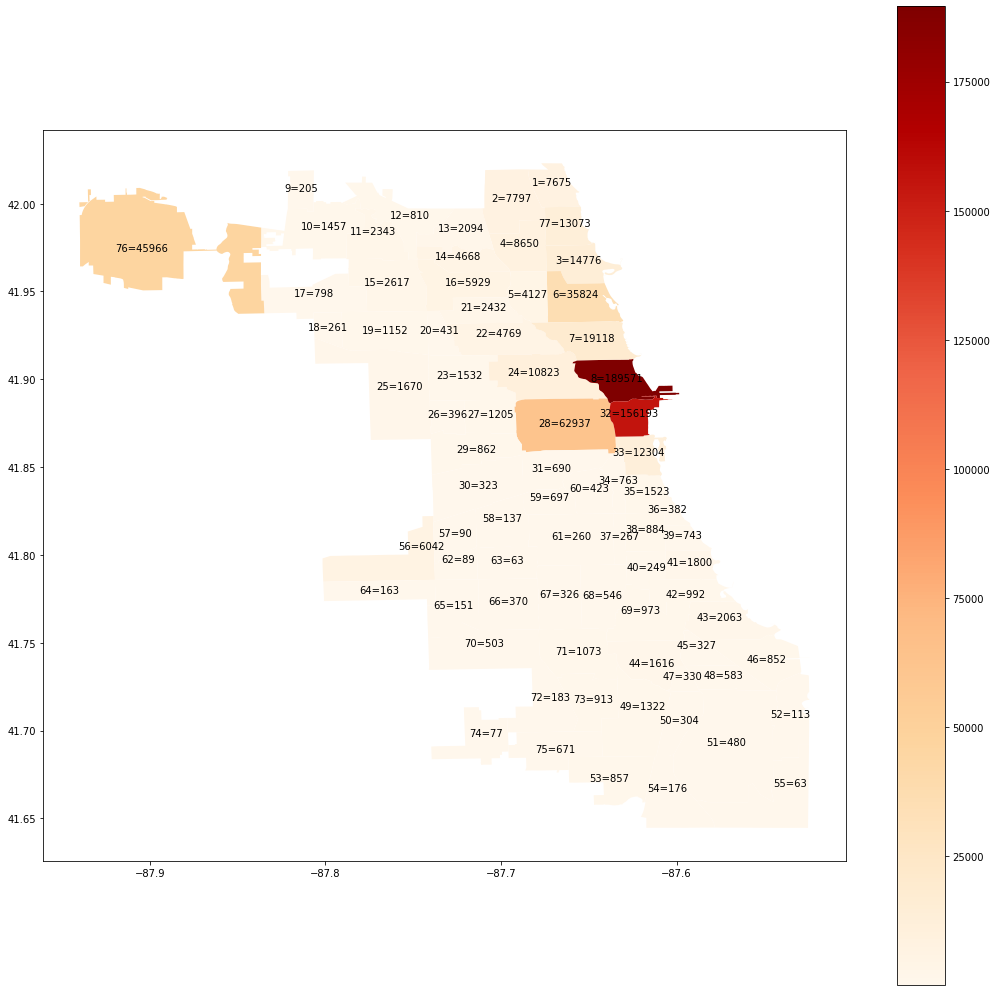

In [26]:
mp.mapGeneratorFromDict(Counter(df_cleaned['pickup_community_area']), cmap=0)


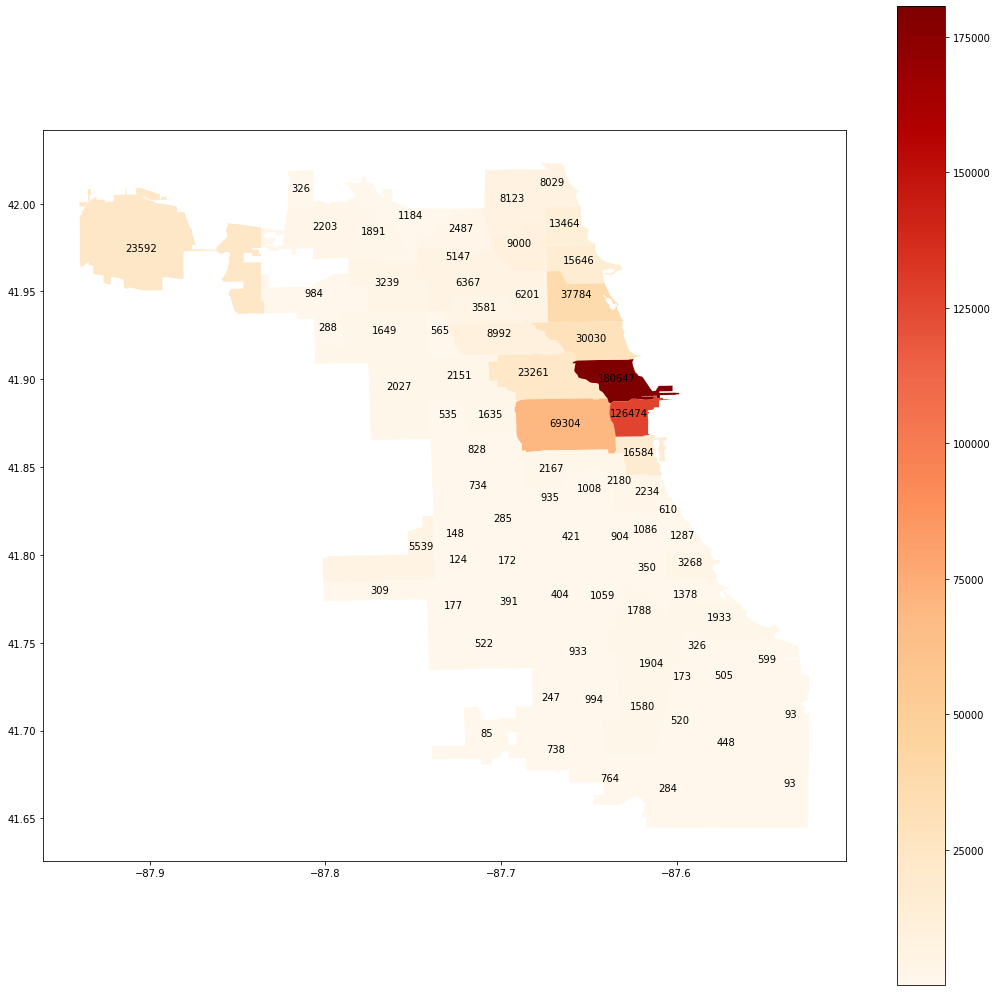

In [14]:
mp.mapGeneratorFromDict(Counter(df_cleaned['dropoff_community_area']), cmap=0)


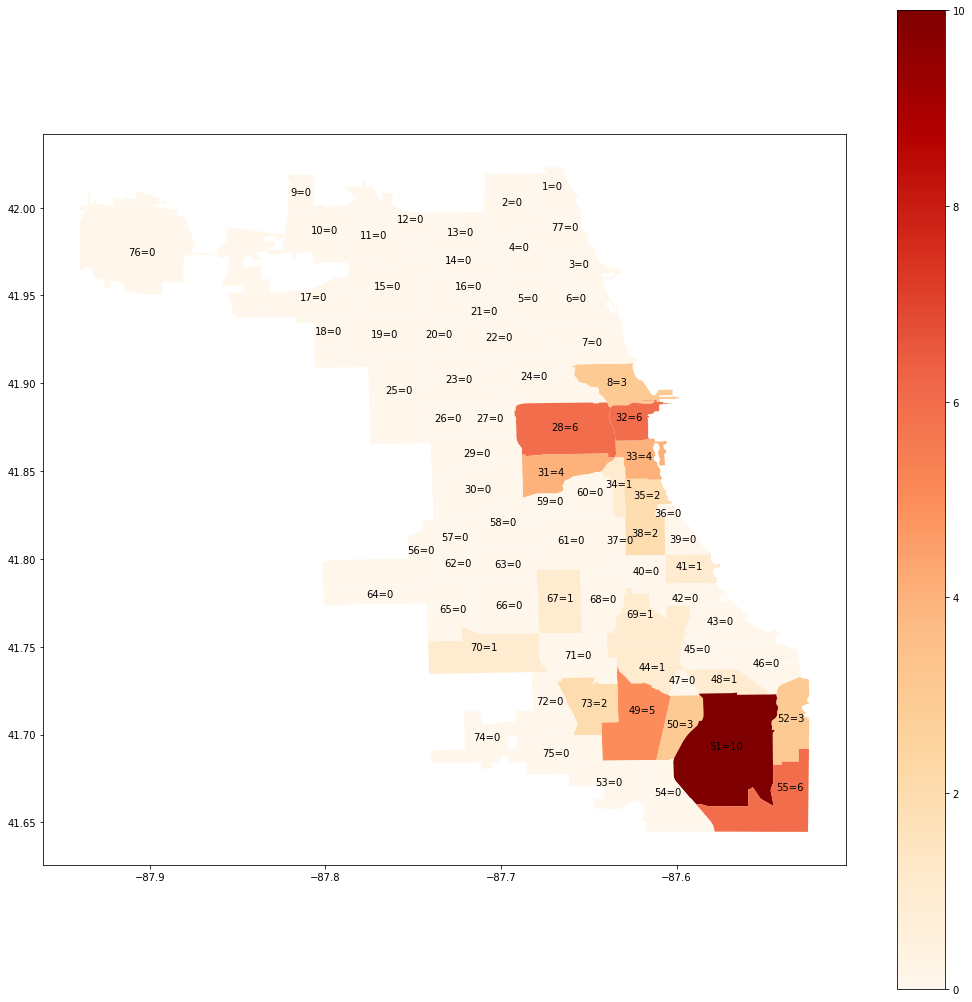

In [27]:
b = df_cleaned.loc[df_cleaned['pickup_community_area'] == 55]
a = Counter(b['dropoff_community_area'])
mp.mapGeneratorFromDict(a, cmap=0)


In [17]:
print(len(df_cleaned.loc[df_cleaned['dropoff_community_area'] != df_cleaned['pickup_community_area']]))
print(len(df_cleaned))

454309
655917


In [8]:
pickups = Counter(df_cleaned['pickup_community_area'])

array = []
counter = 1
while(len(array) < 77):
    # Check if value exists
    if counter in pickups:
        array += [pickups[counter]]
    else:
        array += [0]

    counter += 1
    
print (len(array))

77
